In [1]:
import pandas as pd
pd.set_option("display.max_rows", 999)
pd.set_option('max_colwidth',100)
import numpy as np
from IPython.display import display

In [2]:
# taking csv prepared earlier to explore data 

filepath = "Enron_Kaggle_dataset/email_features.csv"
# Read the data into a pandas dataframe called emails

df_email = pd.read_csv(filepath)

headers = [header for header in df_email.columns]

print("Successfully loaded {} rows and {} columns!".format(df_email.shape[0], df_email.shape[1]))


Successfully loaded 517401 rows and 12 columns!


In [3]:
def cleanemail(email):
    return ' '.join([s.strip() for s in email.splitlines()][15:])

df_email['email-body'] = df_email['message'].apply(cleanemail)

In [4]:
df_email = df_email.drop(columns=['message', 'file', 'X-bc'])

In [5]:
df_email.isna().sum()

Message-Body         0
X-From              29
employee             0
Date                 0
Subject          19187
X-Folder            29
X-To              9153
X-cc            388515
X-Origin            29
email-body           0
dtype: int64

In [6]:
# Convert date column to datetime 

df_email["Date"] = pd.to_datetime(df_email["Date"])

print(df_email.iloc[:1]["Date"])

0   2001-05-14 23:39:00+00:00
Name: Date, dtype: datetime64[ns, UTC]


A sample of randomly selected folders from a newly created folders dataframe shows that there were multiple unique folders used by employees.

In [7]:
df_email["X-Folder"].sample(7)

122515                 \TGEACCO (Non-Privileged)\Geaccone, Tracy\Inbox
347359    \Gerald_Nemec_Dec2000_June2001_2\Notes Folders\All documents
348591             \Nemec, Gerald (Non-Privileged)\Nemec, Gerald\Inbox
113253          \mark fischer 7-12-02\Notes Folders\Discussion threads
133495                       \Chris_Germany_Dec2000\Notes Folders\Sent
63126               \Jeff_Dasovich_Dec2000\Notes Folders\All documents
426381            \Sara_Shackleton_Mar2002\Shackleton, Sara\Sent Items
Name: X-Folder, dtype: object

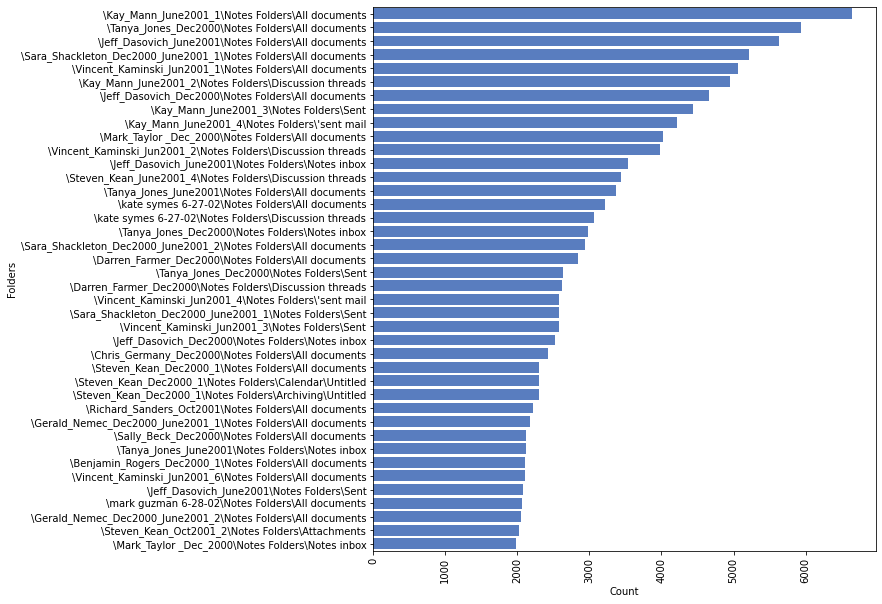

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataframe containing counts of every word in the emails dataframe
email_count = df_email["X-Folder"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["X-Folder"])
count["Folder Names"] = indices
#print count.head()

def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation) 
    plt.show()
    
barplot(df = count[:40], X = "X-Folder", Y = "Folder Names", figsize = (9, 10), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Count", font_scale = 1.2, rotation = 90)


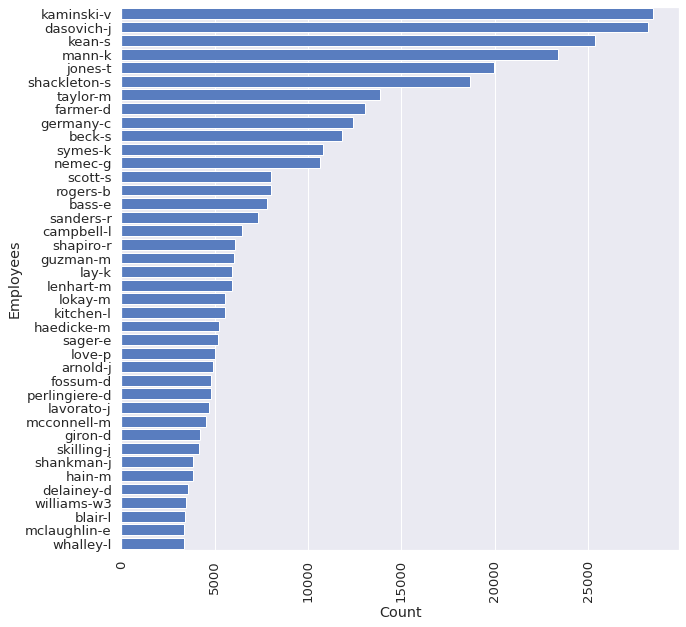

In [9]:
# Bar graph showing 40 employees who had the highest number of sent e-mails

mail_count = df_email["employee"].value_counts()

indices = mail_count.index

count = pd.DataFrame(mail_count)

count.rename(columns = {"employee": "Count"}, inplace = True)

count["Employees"] = indices

barplot(df = count[:40], X = "Count", Y = "Employees", figsize = (10, 10), color = 'b', orient = 'h', ylabel = "Employees", xlabel = "Count", font_scale = .8, rotation = 90)


The `X-Folder` column contains several folders and subfolders that are not needed.
* all_documents
* discussion_threads
* sent
* inbox
* sent_items
* notes_inbox
* _sent_mail
* calendar

In [10]:
def preprocess_folder(data):   
    folders = []
    for item in data:
        if item is None or item is '':
            folders.append(np.nan)
        else:
            item = str(item).split('\\')[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders


df_email["X-Folder"] = preprocess_folder(df_email["X-Folder"])

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-10-68ad560b9e2d>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if item is None or item is '':


Folder cleaned!


In [11]:
# Folders we can filter out
unwanted_folders = ["all documents", "discussion threads", "sent","inbox",
                   "sent items", "'sent mail", "untitled", "notes inbox", "junk file", "calendar"]

# A new dataframe without non-topical folders
df_folder = df_email.loc[~df_email['X-Folder'].isin(unwanted_folders)]

print(df_folder.iloc[:15]["X-Folder"].value_counts())

deleted items    13
contacts          2
Name: X-Folder, dtype: int64


In [12]:
df_folder['X-Folder'].value_counts()

deleted items               50987
personal                     2642
attachments                  2026
meetings                     1872
schedule crawler             1398
                            ...  
portcalc requests               1
switchpoint                     1
tw cas                          1
exmerge - richey, cooper        1
outages                         1
Name: X-Folder, Length: 1772, dtype: int64

In [13]:
hr =  df_folder[df_folder['X-Folder'] == 'hr']

In [14]:
hr.count()

Message-Body    402
X-From          402
employee        402
Date            402
Subject         392
X-Folder        402
X-To            399
X-cc            155
X-Origin        402
email-body      402
dtype: int64

In [15]:
df_folder[df_folder['X-Folder'] == 'federal emergency']


,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body
248536,fyi\n---------------------- forwarded by richard shapiro/na/enron on 05/21/2001 \n05:26 pm -----...,Richard Shapiro,kean-s,2001-05-21 17:26:00+00:00,Revised Electricity Emergency Authorities Memo,federal emergency,Steven J Kean,NaN,KEAN-S,FYI ---------------------- Forwarded by Richard Shapiro/NA/Enron on 05/21/2001 05:26 PM -------...


In [16]:
df_folder[df_folder['X-Folder'] == 'resumes'].count()

Message-Body    609
X-From          609
employee        609
Date            609
Subject         601
X-Folder        609
X-To            607
X-cc            313
X-Origin        609
email-body      609
dtype: int64

In [17]:
federal =  df_folder[df_folder['X-Folder'] == 'federal legislation']

In [18]:
federal.count()

Message-Body    88
X-From          88
employee        88
Date            88
Subject         88
X-Folder        88
X-To            87
X-cc            39
X-Origin        88
email-body      88
dtype: int64

In [19]:
federal.head(3)

,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body
248537,craig gannet reports:\n\n\n i talked to rich glick this morning about the rumored\nadministratio...,Cynthia Sandherr,kean-s,2000-11-13 15:36:00+00:00,DOE Reliability NOI,federal legislation,"Steven J Kean, Richard Shapiro, Tom Briggs","Linda Robertson, Joe Hillings, Joe Hartsoe, Sarah Novosel",KEAN-S,X-bcc: X-Folder: \Steven_Kean_Dec2000_1\Notes Folders\Federal legislation X-Origin: KEAN-S X-Fil...
248538,"this is the amendment offered per the house commerce committee's request in \norder to allow ""a...",Cynthia Sandherr,kean-s,2000-07-21 10:46:00+00:00,UPDATE: Commerce Staff Proposal/Bliley Certification Replacement\n and Technical Corrections,federal legislation,"Steven J Kean, Richard Shapiro, Joe Hartsoe, Joe Hillings, Tom Briggs, James D Steffes, Chris Lo...","ed@buckham.com, bpaxon@akingump.com, john.runyan@ipaper.com, aae@dellnet.com",KEAN-S,"X-To: Steven J Kean, Richard Shapiro, Joe Hartsoe, Joe Hillings, Tom Briggs, James D Steffes, Ch..."
248539,----- forwarded by cindy derecskey/corp/enron on 05/01/2001 10:53 am -----\n\n\tlinda robertson\...,Cindy Derecskey,kean-s,2001-05-01 10:53:00+00:00,Text of Dick Cheney's Toronto speech yesterday,federal legislation,"Steven J Kean, Karen Denne",NaN,KEAN-S,----- Forwarded by Cindy Derecskey/Corp/Enron on 05/01/2001 10:53 AM ----- Linda Robertson 05/...


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [21]:
## Change the reviews type to string
hr['reviews.text'] = hr['email-body'].astype(str)

<ipython-input-21-43092bae38ea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['reviews.text'] = hr['email-body'].astype(str)


In [22]:
## Lowercase all reviews
hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<ipython-input-22-08ca5a67c448>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [23]:
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /home/becode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-23-b8ac47762126>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [24]:
st = PorterStemmer()

hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

<ipython-input-24-8939f66f4a3c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['reviews.text'] = hr['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))


In [25]:
## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

hr['senti_score'] = hr['reviews.text'].apply(senti)

hr.senti_score.head()

<ipython-input-25-828f5d771500>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hr['senti_score'] = hr['reviews.text'].apply(senti)


28873               (-0.006249999999999999, 0.315625)
249135      (0.3227272727272727, 0.47297979797979806)
249136    (-0.054166666666666675, 0.4611111111111111)
249137      (0.1309659090909091, 0.31363636363636366)
249138      (0.12499999999999997, 0.5063492063492063)
Name: senti_score, dtype: object

In [71]:
hr.senti_score[28873]

Sentiment(polarity=-0.006249999999999999, subjectivity=0.315625)

In [62]:
hr.head(2)

,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body,reviews.text,senti_score
28873,"dear managers, \n\nnow would be an optimal time to assess the progress or lack of progress of yo...",Hector McLoughlin <Hector McLoughlin/ENRON@enronXgate@ENRON>,beck-s,2001-04-04 01:52:00+00:00,Action Request,hr,"Sally Beck <Sally Beck/HOU/ECT@ECT>, Thresa A Allen <Thresa A Allen/HOU/ECT@ECT>, Bryce Baxter <...","Sunjay Arya <Sunjay Arya/ENRON@enronXgate>, John Blaylock <John Blaylock/ENRON@enronXgate>, Fran...",BECK-S,"mary.solmonson@enron.com, martha.stevens@enron.com, robert.superty@enron.com, edward.terry@enron...","mary.solmonson@enron.com, martha.stevens@enron.com, robert.superty@enron.com, edward.terry@enron...","(-0.006249999999999999, 0.315625)"
249135,"steve:\n\n i hope this is not too presumptuous, but i'd like to directly advise you of \nmy orga...",Brian Schaffer,kean-s,2000-11-20 06:28:00+00:00,OLER Organization,hr,Steven J Kean,NaN,KEAN-S,"Steve: I hope this is not too presumptuous, but I'd like to directly advise you of my organiza...","steve: hope presumptuous, i'd like directli advis organ within corpor hr. senior director offic ...","(0.3227272727272727, 0.47297979797979806)"


### After this line not sure if the code should run: ????

In [27]:
#Convert date column to datetime 

df_email["Date"] = pd.to_datetime(df_email["Date"])

### Adding classification by year to dataframe:
### Datetime is set as an idex and column year is added
df_email['year'] = pd.DatetimeIndex(df_email['Date']).year

#### Selection of years of interest:
data = df_email[df_email.year > 1998]
data = data[data.year < 2003] 

In [28]:
data.head()

,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body,year
0,here is our forecast\n\n,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,'sent mail,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,Here is our forecast,2001
1,traveling to have a business meeting takes the fun out of the trip. especially if you have to p...,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,'sent mail,John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,Allen-P,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,2001
2,test successful. way to go!!!,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,'sent mail,Leah Van Arsdall,NaN,Allen-P,test successful. way to go!!!,2000
3,"randy,\n\n can you send me a schedule of the salary and level of everyone in the \nscheduling gr...",Phillip K Allen,allen-p,2000-10-23 13:13:00+00:00,NaN,'sent mail,Randall L Gay,NaN,Allen-P,"Randy, Can you send me a schedule of the salary and level of everyone in the scheduling group....",2000
4,let's shoot for tuesday at 11:45.,Phillip K Allen,allen-p,2000-08-31 12:07:00+00:00,Re: Hello,'sent mail,Greg Piper,NaN,Allen-P,Let's shoot for Tuesday at 11:45.,2000


In [29]:
data = df_email.drop_duplicates(['email-body'])

In [30]:
data.shape

(313217, 11)

In [31]:
data['X-From'].value_counts().head(5)

Jeff Dasovich                             6293
Schedule Crawler<pete.davis@enron.com>    5334
Kay Mann                                  5056
Tana Jones                                4639
Vince J Kaminski                          4519
Name: X-From, dtype: int64

In [32]:
data['X-To'].value_counts().head(3)

pete.davis@enron.com                                     5334
Davis, Pete </O=ENRON/OU=NA/CN=RECIPIENTS/CN=PDAVIS1>    3806
Tana Jones                                               2026
Name: X-To, dtype: int64

In [33]:
df_employee = df_email.groupby(['employee']).describe()

In [34]:
PKA = df_email.groupby(['X-From', 'X-To'])

PKA.get_group(('Kay Mann', 'Kay Mann')).count()


Message-Body    53
X-From          53
employee        53
Date            53
Subject         53
X-Folder        53
X-To            53
X-cc            39
X-Origin        53
email-body      53
year            53
dtype: int64

In [35]:
df_email.head(3)

,Message-Body,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body,year
0,here is our forecast\n\n,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,'sent mail,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,Here is our forecast,2001
1,traveling to have a business meeting takes the fun out of the trip. especially if you have to p...,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,'sent mail,John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,Allen-P,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,2001
2,test successful. way to go!!!,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,'sent mail,Leah Van Arsdall,NaN,Allen-P,test successful. way to go!!!,2000


In [36]:
df_email = df_email.drop(columns=['Message-Body'])

In [37]:
df_email.head(3)

,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body,year
0,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,'sent mail,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,Here is our forecast,2001
1,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,'sent mail,John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,Allen-P,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,2001
2,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,'sent mail,Leah Van Arsdall,NaN,Allen-P,test successful. way to go!!!,2000


In [38]:
#df_email.to_csv('data.csv',index=False)

In [39]:
#print(df_email.iloc[:]["X-Folder"].nunique())

df_email['X-Folder'].value_counts()

all documents                    128103
discussion threads                58609
sent                              58168
deleted items                     50987
inbox                             41507
                                  ...  
tw park & ride                        1
cas                                   1
preston vpp                           1
interconnect agreement sample         1
ge                                    1
Name: X-Folder, Length: 1782, dtype: int64

In [40]:
print(df_email["X-Folder"].sample(7))

175260            sent items
211674                credit
267018            sent items
402340            bammel stg
175862         all documents
130436    discussion threads
329019    discussion threads
Name: X-Folder, dtype: object


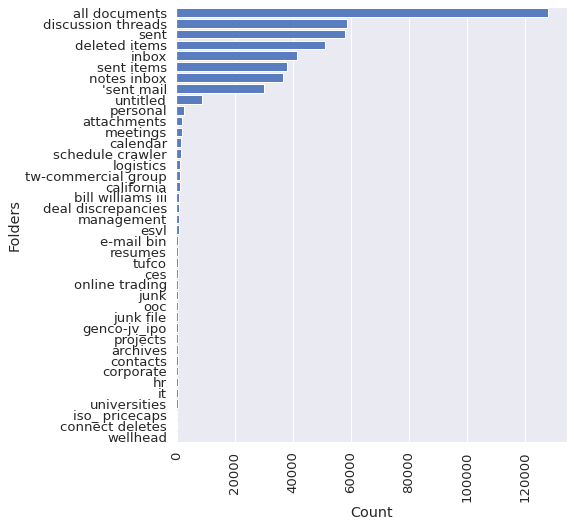

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# dataframe containing counts of every word in the emails dataframe
email_count = df_email["X-Folder"].value_counts()
indices = email_count.index
count = pd.DataFrame(email_count, columns = ["X-Folder"])
count["Folder Names"] = indices
#print count.head()

def barplot(df, X, Y, figsize, color, orient, ylabel, xlabel, font_scale, rotation):
    f, ax = plt.subplots(figsize=figsize)
    sns.set_color_codes("muted")
    sns.barplot(x = X, y = Y, data = df, color = color, orient = orient)
    ax.set(ylabel = ylabel, xlabel = xlabel)
    sns.set(font_scale = font_scale)
    plt.xticks(rotation = rotation) 
    plt.show()
    
barplot(df = count[:40], X = "X-Folder", Y = "Folder Names", figsize = (7, 8), color = 'b', orient = 'h', ylabel = "Folders", xlabel = "Count", font_scale = 1.2, rotation = 90)

In [43]:
def preprocess_folder(data):
    folders = []
    for item in data:
        if item is None or item is '':
            folders.append(np.nan)
        else:
            item = item.split("\\")[-1]
            item = item.lower()
            folders.append(item)
    print("Folder cleaned!")
    return folders      
df_email["Selected"] = preprocess_folder(df_email["X-Folder"])

<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-43-067afa45c8f0>:4: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if item is None or item is '':


Folder cleaned!


In [44]:
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/becode/nltk_data...
[nltk_data] Downloading package punkt to /home/becode/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [45]:
# first, we import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [46]:
# next, we initialize VADER so we can use it within our Python script
sid = SentimentIntensityAnalyzer()

In [47]:
df_email['Date'] = pd.to_datetime(df_email["Date"])
df_email['Date'].dtypes

datetime64[ns, UTC]

In [48]:
df_email.head(3)

,X-From,employee,Date,Subject,X-Folder,X-To,X-cc,X-Origin,email-body,year,Selected
0,Phillip K Allen,allen-p,2001-05-14 23:39:00+00:00,NaN,'sent mail,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,Allen-P,Here is our forecast,2001,'sent mail
1,Phillip K Allen,allen-p,2001-05-04 20:51:00+00:00,Re:,'sent mail,John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>,NaN,Allen-P,Traveling to have a business meeting takes the fun out of the trip. Especially if you have to ...,2001,'sent mail
2,Phillip K Allen,allen-p,2000-10-18 10:00:00+00:00,Re: test,'sent mail,Leah Van Arsdall,NaN,Allen-P,test successful. way to go!!!,2000,'sent mail


In [49]:
df_email.groupby(['X-From'])

In [52]:
# value_counts().plot(kind='bar') #### Houston we have an error

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [54]:
## Change the reviews type to string
data['reviews.text'] = data['email-body'].astype(str)

<ipython-input-54-55ee369b28d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.text'] = data['email-body'].astype(str)


In [55]:
data['reviews.text'].head(3)

0                                                                                 Here is our forecast  
1     Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to ...
2                                                                         test successful.  way to go!!!
Name: reviews.text, dtype: object

In [56]:
## Lowercase all reviews
data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<ipython-input-56-2d9f48872d5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [57]:
data['reviews.text'].head(3)

0                                                                                   here is our forecast
1    traveling to have a business meeting takes the fun out of the trip. especially if you have to pr...
2                                                                          test successful. way to go!!!
Name: reviews.text, dtype: object

In [58]:
# remove punctuation
#df_email['reviews.text'] = df_email['reviews.text'].str.replace(pat = [''])

In [59]:
#df_email['reviews.text'].str.replace('[^ws]','')


In [60]:
import nltk
nltk.download('stopwords')

stop = stopwords.words('english')

data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /home/becode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-60-d359d5ab26a4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


In [61]:
st = PorterStemmer()

data['reviews.text'] = data['reviews.text'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

KeyboardInterrupt: 

In [ ]:
data['reviews.text'].head(3)

In [ ]:
df_email.head(3)

In [ ]:
## Define a function which can be applied to calculate the score for the whole dataset

def senti(x):
    return TextBlob(x).sentiment  

data['senti_score'] = data['reviews.text'].apply(senti)

data.senti_score.head()

In [ ]:
data.senti_score.head()